# Autoencoders
Autoencoders are neural networks able to learn dense representations of the input data in a unsupervised way. The lower dimensionality output is generally called latent representation or coding. The goal of the algorithm is to reduce dimensionality (hence operate a compression), while minimizing the compression loss, i.e. the amount of information that is not possible to retrieve after the decompression.
An autoencoder is composed of two main parts: an **encoder** which converts the original inputs to a reduced latent representation, and a **decoder** that does the inverse operation of converrting the internal representation to the output, which is simply a reconstruction of the original input.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/Lorenzo-Giardi/tf-keras/blob/master/9_Autoencoders/autoencoders.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [1]:
import keras
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from keras.losses import mean_squared_error
from keras.models import Sequential
from keras.layers import Flatten, Dense, SimpleRNN, Input, Concatenate, Reshape, Conv2D, MaxPool2D, Conv2DTranspose
from keras.optimizers import SGD, adam, nadam

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
random_seed = 56841
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

## PCA
When an autoencoder only uses linear activation functions and the MSE is used as the cost function, then the network will perfom linear PCA.

In [3]:
# load some data
housing = fetch_california_housing()
x_train, x_val, y_train, y_val = train_test_split(
                                housing.data, housing.target, random_state = random_seed)

scl = StandardScaler()
x_train = scl.fit_transform(x_train)
x_val = scl.transform(x_val)

x_train.shape[1:]

(8,)

In [4]:
encoder = Sequential([Dense(2, input_shape=x_train.shape[1:])])
decoder = Sequential([Dense(8, input_shape=[2])])
autoencoder = Sequential([encoder, decoder])

In [5]:
autoencoder.compile(loss='mse', optimizer='nadam')

In [6]:
history_1 = autoencoder.fit(x_train, x_train, epochs=20, validation_data=[x_val, x_val])

Train on 15480 samples, validate on 5160 samples
Epoch 1/20
15480/15480 [==============================] - 1s 73us/step - loss: 0.8254 - val_loss: 0.5834
Epoch 2/20
15480/15480 [==============================] - 1s 51us/step - loss: 0.7130 - val_loss: 0.5390
Epoch 3/20
15480/15480 [==============================] - 1s 50us/step - loss: 0.6658 - val_loss: 0.5056
Epoch 4/20
15480/15480 [==============================] - 1s 45us/step - loss: 0.6280 - val_loss: 0.4770
Epoch 5/20
15480/15480 [==============================] - 1s 51us/step - loss: 0.5976 - val_loss: 0.4596
Epoch 6/20
15480/15480 [==============================] - 1s 43us/step - loss: 0.5763 - val_loss: 0.4489
Epoch 7/20
15480/15480 [==============================] - 1s 42us/step - loss: 0.5585 - val_loss: 0.4413
Epoch 8/20
15480/15480 [==============================] - 1s 42us/step - loss: 0.5445 - val_loss: 0.4358
Epoch 9/20
15480/15480 [==============================] - 1s 42us/step - loss: 0.5352 - val_loss: 0.4325
Epoch 

In [7]:
pca_encoding = encoder.predict(x_train)
pca_encoding_val = encoder.predict(x_val)
pca_encoding.shape

(15480, 2)

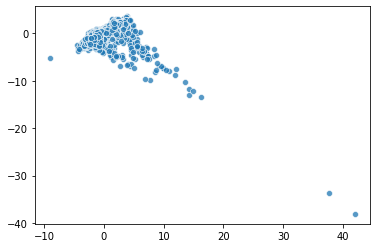

In [8]:
sns.scatterplot(pca_encoding[:,0], pca_encoding[:,1], alpha=0.75)
plt.show()

#### Now lets repeat PCA using the **SK-learn** function and compare the results.

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train)
pca_x = pca.transform(x_val)
pca_x.shape

(5160, 2)

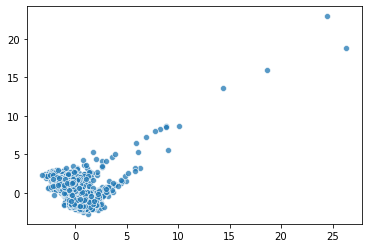

In [10]:
sns.scatterplot(pca_x[:,1], pca_x[:,0], alpha=0.75)
plt.show()

## Stacked Autoencoders
Rather than using plain simple linear PCA, we may want to use a stacked autoencoder with multiple non-linear layer. These are simple fully-connected layers, however, attention must be paid to avoid overfitting!

In [11]:
encoder = Sequential([Dense(6, activation='relu', input_shape=x_train.shape[1:]),
                      Dense(2, activation='relu')])
decoder = Sequential([Dense(6, activation='relu', input_shape=[2]),
                      Dense(8, input_shape=[2])])
autoencoder = Sequential([encoder, decoder])

In [12]:
autoencoder.compile(loss='mse', optimizer='nadam')

In [13]:
history_2 = autoencoder.fit(x_train, x_train, epochs=10, validation_data=[x_val, x_val])

Train on 15480 samples, validate on 5160 samples
Epoch 1/10
15480/15480 [==============================] - 1s 59us/step - loss: 0.7573 - val_loss: 0.4467
Epoch 2/10
15480/15480 [==============================] - 1s 47us/step - loss: 0.5195 - val_loss: 0.3725
Epoch 3/10
15480/15480 [==============================] - 1s 50us/step - loss: 0.4387 - val_loss: 0.3392
Epoch 4/10
15480/15480 [==============================] - 1s 54us/step - loss: 0.4113 - val_loss: 0.3364
Epoch 5/10
15480/15480 [==============================] - 1s 51us/step - loss: 0.4000 - val_loss: 0.3206
Epoch 6/10
15480/15480 [==============================] - 1s 48us/step - loss: 0.3895 - val_loss: 0.3141
Epoch 7/10
15480/15480 [==============================] - 1s 48us/step - loss: 0.3791 - val_loss: 0.3139
Epoch 8/10
15480/15480 [==============================] - 1s 49us/step - loss: 0.3760 - val_loss: 0.3016
Epoch 9/10
15480/15480 [==============================] - 1s 47us/step - loss: 0.3615 - val_loss: 0.2960
Epoch 

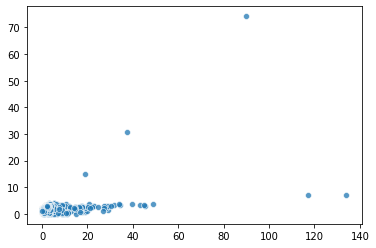

In [14]:
stack_encoding = encoder.predict(x_train)
stack_encoding_val = encoder.predict(x_val)
sns.scatterplot(stack_encoding[:,0], stack_encoding[:,1], alpha=0.75)
plt.show()

## Comparison: regression on encoded features

In [15]:
model = Sequential([
        Dense(50, activation='relu', input_shape = x_train.shape[1:]),
        Dense(50, activation='relu'),
        Dense(1)
        ])
model.compile(loss = 'mse', optimizer = 'nadam')
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Train on 15480 samples, validate on 5160 samples
Epoch 1/20
15480/15480 [==============================] - 1s 53us/step - loss: 0.6802 - val_loss: 0.4300
Epoch 2/20
15480/15480 [==============================] - 1s 44us/step - loss: 0.4269 - val_loss: 0.3630
Epoch 3/20
15480/15480 [==============================] - 1s 45us/step - loss: 0.3824 - val_loss: 0.3482
Epoch 4/20
15480/15480 [==============================] - 1s 45us/step - loss: 0.3460 - val_loss: 0.3298
Epoch 5/20
15480/15480 [==============================] - 1s 45us/step - loss: 0.3348 - val_loss: 0.3321
Epoch 6/20
15480/15480 [==============================] - 1s 46us/step - loss: 0.3247 - val_loss: 0.3096
Epoch 7/20
15480/15480 [==============================] - 1s 46us/step - loss: 0.3133 - val_loss: 0.3031
Epoch 8/20
15480/15480 [==============================] - 1s 47us/step - loss: 0.3181 - val_loss: 0.2994
Epoch 9/20
15480/15480 [==============================] - 1s 46us/step - loss: 0.3093 - val_loss: 0.3024
Epoch 

In [16]:
model = Sequential([
        Dense(50, activation='relu', input_shape = pca_encoding.shape[1:]),
        Dense(50, activation='relu'),
        Dense(1)
        ])
model.compile(loss = 'mse', optimizer = 'nadam')
history = model.fit(pca_encoding, y_train, epochs=20, validation_data=(pca_encoding_val, y_val))

Train on 15480 samples, validate on 5160 samples
Epoch 1/20
15480/15480 [==============================] - 1s 52us/step - loss: 1.3954 - val_loss: 1.0359
Epoch 2/20
15480/15480 [==============================] - 1s 44us/step - loss: 1.0475 - val_loss: 0.9811
Epoch 3/20
15480/15480 [==============================] - 1s 44us/step - loss: 0.9958 - val_loss: 0.9654
Epoch 4/20
15480/15480 [==============================] - 1s 42us/step - loss: 0.9933 - val_loss: 1.0089
Epoch 5/20
15480/15480 [==============================] - 1s 45us/step - loss: 0.9986 - val_loss: 0.9547
Epoch 6/20
15480/15480 [==============================] - 1s 45us/step - loss: 0.9687 - val_loss: 0.9435
Epoch 7/20
15480/15480 [==============================] - 1s 44us/step - loss: 0.9742 - val_loss: 0.9407
Epoch 8/20
15480/15480 [==============================] - 1s 44us/step - loss: 0.9683 - val_loss: 0.9379
Epoch 9/20
15480/15480 [==============================] - 1s 48us/step - loss: 0.9638 - val_loss: 0.9344
Epoch 

In [17]:
model = Sequential([
        Dense(50, activation='relu', input_shape = pca_encoding.shape[1:]),
        Dense(50, activation='relu'),
        Dense(1)
        ])
model.compile(loss = 'mse', optimizer = 'nadam')
history = model.fit(stack_encoding, y_train, epochs=20, validation_data=(stack_encoding_val, y_val))

Train on 15480 samples, validate on 5160 samples
Epoch 1/20
15480/15480 [==============================] - 1s 53us/step - loss: 1.4831 - val_loss: 1.1803
Epoch 2/20
15480/15480 [==============================] - 1s 44us/step - loss: 1.2324 - val_loss: 1.1388
Epoch 3/20
15480/15480 [==============================] - 1s 47us/step - loss: 1.1966 - val_loss: 2.1368
Epoch 4/20
15480/15480 [==============================] - 1s 46us/step - loss: 1.2422 - val_loss: 1.1815
Epoch 5/20
15480/15480 [==============================] - 1s 43us/step - loss: 1.1744 - val_loss: 1.0948
Epoch 6/20
15480/15480 [==============================] - 1s 45us/step - loss: 1.1450 - val_loss: 1.0934
Epoch 7/20
15480/15480 [==============================] - 1s 45us/step - loss: 1.1264 - val_loss: 1.0796
Epoch 8/20
15480/15480 [==============================] - 1s 44us/step - loss: 1.1409 - val_loss: 1.0788
Epoch 9/20
15480/15480 [==============================] - 1s 45us/step - loss: 1.1120 - val_loss: 1.0553
Epoch 

## Encoding Fashion MNIST
The dataframe used up to now has only 8 features, thus it makes little sense to use apply a feature dimensionality technique! Instead, Fashion MNIST have 28x28=784 input features (i.e. each pixel).

In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_val, x_train = x_train[:5000] / 255.0, x_train[5000:] /255.0
y_val, y_train = y_train[:5000], y_train[5000:]

Notice that the final output layer should have a sigmoid activation because the pixel intensity is between 0 and 1!

In [19]:
encoder = Sequential([
    Flatten(input_shape = [28, 28]),
    Dense(100, activation='selu'),
    Dense(50, activation='selu'),
])
decoder = Sequential([
    Dense(100, activation='selu', input_shape = [50]),
    Dense(784, activation='sigmoid'),
    Reshape([28,28])
])
stacked_ae = Sequential([encoder, decoder])

In [20]:
stacked_ae.compile(loss = 'binary_crossentropy', optimizer = 'nadam')

In [21]:
history_ae = stacked_ae.fit(x_train, x_train, epochs=10, validation_data=[x_val, x_val])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 141us/step - loss: 0.3031 - val_loss: 0.2819
Epoch 2/10
55000/55000 [==============================] - 7s 136us/step - loss: 0.2823 - val_loss: 0.2779
Epoch 3/10
55000/55000 [==============================] - 7s 135us/step - loss: 0.2781 - val_loss: 0.2742
Epoch 4/10
55000/55000 [==============================] - 7s 136us/step - loss: 0.2758 - val_loss: 0.2718
Epoch 5/10
55000/55000 [==============================] - 7s 135us/step - loss: 0.2742 - val_loss: 0.2711
Epoch 6/10
55000/55000 [==============================] - 8s 137us/step - loss: 0.2731 - val_loss: 0.2699
Epoch 7/10
55000/55000 [==============================] - 7s 134us/step - loss: 0.2722 - val_loss: 0.2692
Epoch 8/10
55000/55000 [==============================] - 7s 135us/step - loss: 0.2715 - val_loss: 0.2684
Epoch 9/10
55000/55000 [==============================] - 8s 138us/step - loss: 0.2710 - val_loss: 0.26

#### We can plot the compressed images and compare them with the original ones

In [22]:
reconstructions = stacked_ae.predict(x_val[:10])

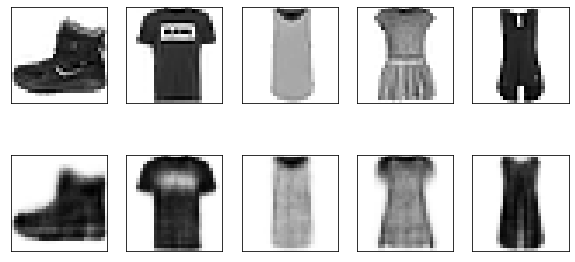

In [23]:
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_val[i], cmap=plt.cm.binary)
for i in range(5):
    plt.subplot(2,5,5+i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(reconstructions[i], cmap=plt.cm.binary)
plt.show()

Autoencoders (or PCA) can also be used as a first dimensionality reduction technique followed by another one (e.g. t-SNE which is computationally intensive). We can clearly see that some classes get separated very well.

In [24]:
from sklearn.manifold import TSNE

x_val_ae = encoder.predict(x_val)
tsne = TSNE()
x_val_tsne = tsne.fit_transform(x_val_ae)

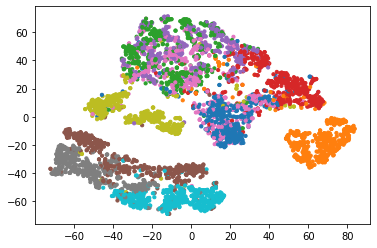

In [25]:
plt.scatter(x_val_tsne[:,0], x_val_tsne[:,1], c=y_val, s=10, cmap='tab10')

## Convolutional Autoencoders
Could be used for improved performances on images or sequences. The encoder part is a standard CNN, composed of convolutional and pooling layers, instead the decoder uses transpose convolutional layers which apply the reverse transformation.

In [26]:
conv_encoder = Sequential([
    Reshape([28,28,1], input_shape=[28,28]),
    Conv2D(16, 3, padding='same', activation='selu'),
    MaxPool2D(2),
    Conv2D(32, 3, padding='same', activation='selu'),
    MaxPool2D(2),
    Conv2D(32, 3, padding='same', activation='selu'),
    MaxPool2D(2)
])

conv_decoder = Sequential([
    Conv2DTranspose(32, 3, strides = 2, padding='valid', activation='selu', input_shape = [3,3,32]),
    Conv2DTranspose(16, 3, strides = 2, padding='same', activation='selu'),
    Conv2DTranspose(1, 3, strides = 2, padding='same', activation='sigmoid'),
    Reshape([28,28])
    
])

conv_ae  = Sequential([conv_encoder, conv_decoder])

In [27]:
conv_ae.compile(loss = 'binary_crossentropy', optimizer = 'nadam')

In [28]:
history_cae = conv_ae.fit(x_train, x_train, epochs=10, validation_data=[x_val, x_val])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 39s 706us/step - loss: 0.2901 - val_loss: 0.2727
Epoch 2/10
55000/55000 [==============================] - 40s 723us/step - loss: 0.2704 - val_loss: 0.2649
Epoch 3/10
55000/55000 [==============================] - 39s 716us/step - loss: 0.2666 - val_loss: 0.2623
Epoch 4/10
55000/55000 [==============================] - 39s 712us/step - loss: 0.2646 - val_loss: 0.2605
Epoch 5/10
55000/55000 [==============================] - 40s 721us/step - loss: 0.2632 - val_loss: 0.2595
Epoch 6/10
55000/55000 [==============================] - 39s 710us/step - loss: 0.2622 - val_loss: 0.2586
Epoch 7/10
55000/55000 [==============================] - 39s 713us/step - loss: 0.2614 - val_loss: 0.2587
Epoch 8/10
55000/55000 [==============================] - 43s 785us/step - loss: 0.2607 - val_loss: 0.2578
Epoch 9/10
55000/55000 [==============================] - 41s 737us/step - loss: 0.2602 - val_l

In [29]:
reconstructions = conv_ae.predict(x_val[:10])

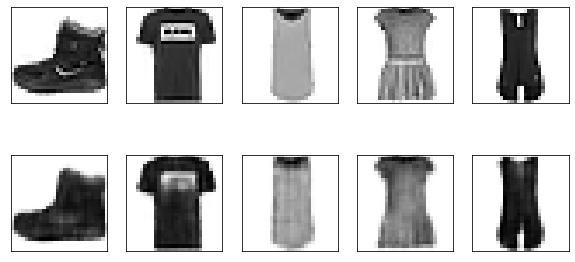

In [30]:
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_val[i], cmap=plt.cm.binary)
for i in range(5):
    plt.subplot(2,5,5+i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(reconstructions[i], cmap=plt.cm.binary)
plt.show()

## Variational Autoencoders
Variational autoencoders are probabilistic, meaning that their outputs are partially stochastic (even predictions made after training), and generative, meaning that they are able to generate new instances that are similar to those in the training set.
The main difference with respect to a stacked/convolutional autoencoder, is that rather that the output layer of the encoder does not directly produce latent representation of the inputs, but rather produces a mean coding $\mu$ and a standard deviation $\sigma$, which are used as the parameters of a Gaussian distribution from which the actual codings are drawn.

In [31]:
K = keras.backend

class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

First, build the encoder part using the Functional API.

In [32]:
codings_size = 10

inputs = Input(shape=[28,28])
z = Flatten()(inputs)
z = Dense(150, activation = 'selu')(z)
z = Dense(100, activation = 'selu')(z)
codings_mean = Dense(codings_size)(z)
codings_log_var = Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])

variational_encoder = keras.Model(
        inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

Then we can build the decoder, which is a simple stack of fully connected layers.

In [33]:
variational_decoder = Sequential([
    Dense(100, activation='selu', input_shape=[codings_size]),
    Dense(150, activation='selu'),
    Dense(784, activation='sigmoid'),
    Reshape([28,28])
])

Next, we put the encoder and the decoder together using the Function API (because the encoder has multiple outputs).

In [34]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.Model(inputs=[inputs], outputs=[reconstructions])

Finally, we add the the latent and reconstruction loss.

In [35]:
latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean), axis = -1)
variational_ae.add_loss(K.mean(latent_loss)/784.)

Ready to compile and train!

In [36]:
variational_ae.compile(loss='binary_crossentropy', optimizer='nadam')

In [37]:
history_vae = variational_ae.fit(x_train, x_train, epochs=20, batch_size=128, validation_data=[x_val, x_val])

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 6s 101us/step - loss: 0.3801 - val_loss: 0.3464
Epoch 2/20
55000/55000 [==============================] - 5s 98us/step - loss: 0.3353 - val_loss: 0.3333
Epoch 3/20
55000/55000 [==============================] - 5s 84us/step - loss: 0.3267 - val_loss: 0.3210
Epoch 4/20
55000/55000 [==============================] - 5s 84us/step - loss: 0.3223 - val_loss: 0.3213
Epoch 5/20
55000/55000 [==============================] - 5s 84us/step - loss: 0.3196 - val_loss: 0.3173
Epoch 6/20
55000/55000 [==============================] - 5s 85us/step - loss: 0.3174 - val_loss: 0.3144
Epoch 7/20
55000/55000 [==============================] - 5s 83us/step - loss: 0.3161 - val_loss: 0.3128
Epoch 8/20
55000/55000 [==============================] - 5s 83us/step - loss: 0.3149 - val_loss: 0.3109
Epoch 9/20
55000/55000 [==============================] - 5s 86us/step - loss: 0.3138 - val_loss: 0.3128
Epoch

In [38]:
reconstructions = variational_ae.predict(x_val[:10])

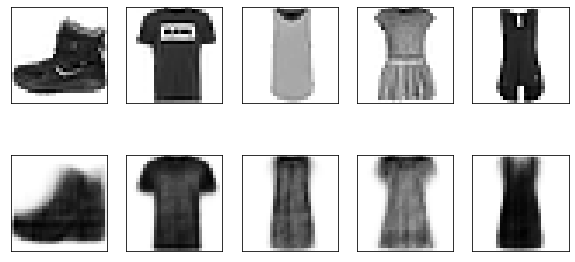

In [39]:
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_val[i], cmap=plt.cm.binary)
for i in range(5):
    plt.subplot(2,5,5+i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(reconstructions[i], cmap=plt.cm.binary)
plt.show()